Linear regression --   
.> relationship x and y  
>Besr fit line -- cover most of the data point or lie on most of the data point
> y = mx +c ---- y - dependent variable ,  x --- independent variable
                 c -- intercept
                 m -- slope


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("Used_Bikes.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [60]:
# data wrangling(cleaning) -- null value treatment
# duplicate value treatment 
# missing value treatment
#outlier treatment

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32643     True
32644     True
32645     True
32646     True
32647     True
Length: 32648, dtype: bool

In [61]:
df =df.drop_duplicates()

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.isnull()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9362,False,False,False,False,False,False,False,False
9369,False,False,False,False,False,False,False,False
9370,False,False,False,False,False,False,False,False
9371,False,False,False,False,False,False,False,False


In [64]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [65]:
df.dropna() # it drops are null values

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [66]:
df.dropna(inplace=True)

In [67]:
##cat col ----num col
cat_col = df.select_dtypes(include = 'object') # in object type they are categorical data
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [68]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bike_name  7324 non-null   object
 1   city       7324 non-null   object
 2   owner      7324 non-null   object
 3   brand      7324 non-null   object
dtypes: object(4)
memory usage: 286.1+ KB


In [69]:
# graphs -- for proper iunderstanding

In [70]:
#eda = exploratory data analysis
num_col = df.select_dtypes(exclude='object')
num_col.head()
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   age         7324 non-null   float64
 3   power       7324 non-null   float64
dtypes: float64(4)
memory usage: 286.1 KB


In [71]:
#feature selection
cat_col = cat_col.drop(["bike_name","city"],axis=1)


In [72]:
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [73]:
#cat ----> num
#label encoding
##one hot encoding


In [74]:
##one hot encoding  -- convert the output into zero and ones
pd.get_dummies(cat_col).head() ###get_dummies-- 

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [75]:
pd.get_dummies(cat_col).astype(int).head()  # astype --convert the type of output



,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
##label encoding  -- irdinary encoding
cat_col["owner"].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [77]:
dt = {"First Owner":1,
        "Second Owner":2,
        "Third Owner":3,
      	"Fourth Owner Or More":4}

In [78]:
cat_col["owner"] = cat_col["owner"].map(dt) # map -- uthake ke daal de deta dusre variable main elements ko

In [79]:
cat_col

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha
...,...,...
9362,1,Hero
9369,1,Bajaj
9370,1,Harley-Davidson
9371,1,Bajaj


In [80]:
cat_col["owner"].value_counts()

owner
1    6642
2     588
3      84
4      10
Name: count, dtype: int64

In [81]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [82]:
{ i:key for key , i in enumerate(list(cat_col["brand"].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [83]:
dt1 ={ i:key for key , i in enumerate(list(cat_col["brand"].unique()))}
dt1

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [84]:
cat_col["brand"] = cat_col["brand"].map(dt1)

In [85]:
cat_col["brand"]

0        0
1        1
2        2
3        0
4        3
        ..
9362     5
9369     6
9370    14
9371     6
9372     6
Name: brand, Length: 7324, dtype: int64

In [86]:
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [87]:
final_df = pd.concat([num_col,cat_col],axis = 1)
final_df

,price,kms_driven,age,power,owner,brand
0,35000.0,17654.0,3.0,110.0,1,0
1,119900.0,11000.0,4.0,350.0,1,1
2,600000.0,110.0,8.0,675.0,1,2
3,65000.0,16329.0,4.0,180.0,1,0
4,80000.0,10000.0,3.0,150.0,1,3
...,...,...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0,1,5
9369,35000.0,60000.0,9.0,220.0,1,6
9370,450000.0,3430.0,4.0,750.0,1,14
9371,139000.0,21300.0,4.0,400.0,1,6


In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   age         7324 non-null   float64
 3   power       7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   brand       7324 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


In [89]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
#model trainiing -- training(80%) , testing(20%)
matrix = final_df.corr()
matrix

,price,kms_driven,age,power,owner,brand
price,1.000000,-0.199951,-0.248752,0.807641,-0.005188,0.288409
kms_driven,-0.199951,1.000000,0.367518,-0.168295,0.062612,-0.036161
age,-0.248752,0.367518,1.000000,-0.164211,0.203151,-0.030263
power,0.807641,-0.168295,-0.164211,1.000000,0.043746,0.068647
owner,-0.005188,0.062612,0.203151,0.043746,1.000000,0.005844
brand,0.288409,-0.036161,-0.030263,0.068647,0.005844,1.000000


<Axes: >

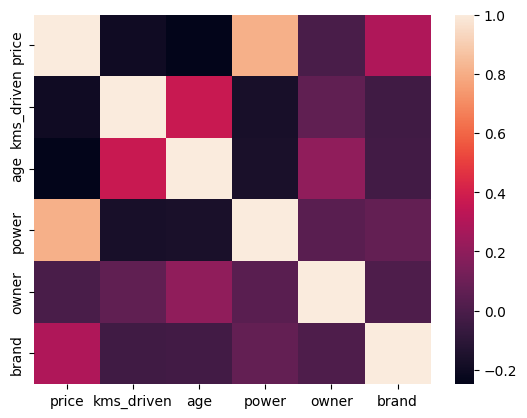

In [91]:
sns.heatmap(matrix)

<Axes: >

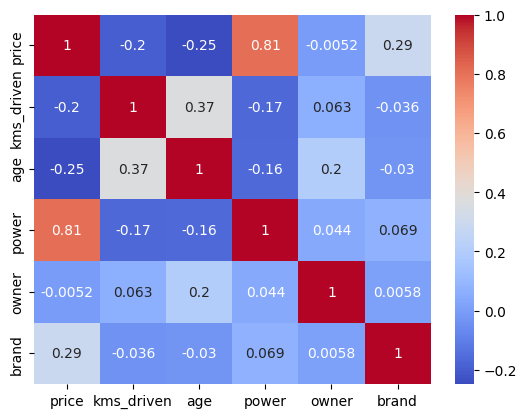

In [92]:
sns.heatmap(matrix, annot = True , cmap= "coolwarm")

In [93]:
#divide the data into independent and dependent features
x = final_df.drop("price",axis = 1)
y = final_df["price"]

In [94]:
##training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train , y_test = train_test_split (x,y,
                                                    test_size= 0.2,
                                                    random_state =42)

In [95]:
from sklearn.linear_model import LinearRegression ## you have to know which algorithm lies ij which module
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
lr.score(x_train,y_train)

0.7053826605671762

In [97]:
lr.score(x_test,y_test) #accuracy

0.7586900869386208

In [98]:
## model evaluation --- prediction 
y_pred = lr.predict(x_test)
y_pred

array([125382.54523531, 216422.20333617,  96966.48595241, ...,
        72233.83615101, 208856.67620686,   9305.60087569])

In [99]:
## making a dataframe
df1 = pd.DataFrame({"Actual":y_test , 'Predicted': y_pred})
df1

,Actual,Predicted
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


In [102]:
## model evaluation
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test,y_pred))
print("MSE", metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt( metrics.mean_squared_error(y_test,y_pred)))

MAE 34658.309865610376
MSE 4697994405.450046
RMSE 68541.9171416298


TypeError: title() missing 1 required positional argument: 'label'

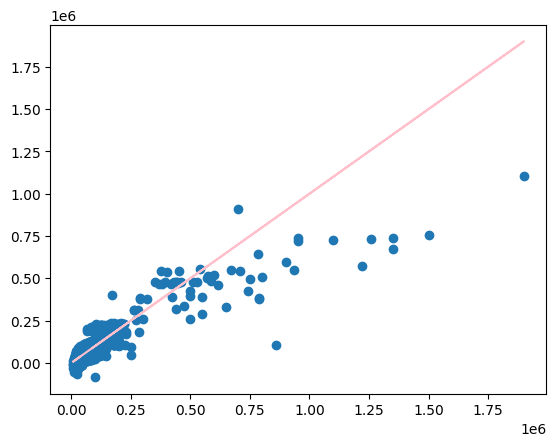

In [109]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color = "pink")
plt.title()